# Homework 7: Overfitting and Model Selection
## ECE 204 Data Science & Engineering

Some questions in this homework mention the banknote authentication dataset. The dataset included in this homework is a slight modification of the UCI Machine Learning banknote authentication dataset: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. This dataset includes 5 features for images of different banknotes:

1. variance for a transformed image of the banknote 
2. skewness for a transformed image of the banknote
3. curtosis for a transformed image of the banknote
4. entropy of banknote images image (continuous)
5. class (integer). This specifies genuine and forged banknotes.

The bank note authentication dataset is in `banknote-auth.csv`.

Following are few questions that deal with the concept of model selection and overfitting.

In [2]:
# Add any import statements you may need here!
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

---
**Problem 1.**
Import the banknote dataset in `banknote-auth.csv`. Train and test data are provided using `train_test_split`.
1. Split the training data further into **train** and **validation** sets. To accomplish this, split the **train** dataset (`X_train, y_train`) using the **`train_test_split`** method, with a **`80:20 train:test`** split, and **`random_state=0`**.
    * For the rest of the question, the 80% split of the data will be **train2** and the 20% split of the data as **validation**.
2. Train a KNN classifier on the **train2** dataset with **`K=4`**
3. **What is the accuracy of the model on the validation set?**

`NOTE`: The test dataset will not be used in this question. Feel free to ignore it. This question is focused on finding the quality of one hyper-parameter using only the train data.

In [3]:
df = pd.read_csv('banknote-auth.csv')

features = ['Variance', 'Skewness', 'Curtosis', 'Entropy']
labels = 'Class'

X = df[features]
y = df[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train2, y_train2)
Ypred = knn.predict(X_test2)

print(metrics.accuracy_score(y_test2,Ypred))

0.9736842105263158


---
**Problem 2.**
Import the banknote dataset in `banknote-auth.csv`. Train and test data have been provided using `train_test_split` using the same code as above. Create a KNN classifier with 4 nearest neighbors. **What is the 5 fold cross validation score using the training data?**

* `Note:` The test dataset will not be used in this question. Feel free to ignore it. This question is focused on finding the quality of one hyper-parameter.
* `Note:` You will get 5 scores for the 5-fold cross validation. Report the mean of all such scores.
* `Hint:` https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

Question 1 and Question 2 are different methods to get nearly the same outcome. They are both methods to find the score for a given hyper-parameter using only the training dataset. The rest of the homework will use `cross_val_score`.

In [5]:
df = pd.read_csv('banknote-auth.csv')

features = ['Variance', 'Skewness', 'Curtosis', 'Entropy']
labels = 'Class'

X = df[features]
y = df[labels]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [6]:
# Your code here
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 4)
#knn.fit(X_train2, y_train2)


scores = (cross_val_score(knn,X_train2,y_train2))
print(np.mean(scores))

#print(metrics.accuracy_score(y_test2,Ypred))

0.9844613001442231


---
**Problem 3.**
In the previous questions, scores for a fixed hyperparameter `K` were found. Now, let's find the best `K` for the same dataset. Only use the training data for this (it's part of the training process).

Find the best **K between 1 to 20 (both inclusive)** for the **KNN** model with **10-fold** cross-validation. `cross_val_score` returns multiple values for each `K`. But, "best" is defined to be "the highest mean score on the validation sets with `cross_val_score`." **What is the best value of `K`?** 

`Hint:` Use the training set to find the best value of `K`. It's part of the training process. You only need the training dataset for this question. Though it's not used (and it will not be asked about), reserve the testing dataset for the final model scoring.

`Gold star question:` what's the relationship between model complexity and validation error? How does `max_depth` influence the training accuracy and the test accuracy?

In [7]:
df = pd.read_csv("banknote-auth.csv")
features = ['Variance', 'Skewness', 'Curtosis', 'Entropy']
labels = 'Class'

X = df.loc[:, features]
y = df.loc[:, labels]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [8]:
# Your code here
k_range = range(1,21)

scores_list = []

for k in k_range:
    Knn = KNeighborsClassifier(n_neighbors = k)
    
    scores = (cross_val_score(Knn,X_train,y_train, cv = 10))
    scoreAvg = np.mean(scores)
    #print(scores)
    scores_list.append(scoreAvg)
    
        
scores_list    
np.max(scores_list)

#Gold star Q  = as max depth increases, the complexity increases. As complexity (and Max_depth) go over the K value,
#the training data will be more and more accurate however the testing data will be
#less and less accurate

0.9843626968503937

---
**Problem 4.**
This question will use a `DecisionTreeClassifier` with `random_state=42`. The train and test data are given.

1. Find the best value of `max_depth` from 1 to 15 (both inclusive) with 10-fold cross validation on the given training dataset. 
2. Using this best `max_depth`, train a `DecisionTreeClassifier` (`random_state=42`) with the training data, and report accuracy on the test data.

**What is the accuracy of the DecisionTreeClassifier that uses the "best" `max_depth` value?** 

`NOTE`: `cross_val_score` will return 10 scores for 10-fold cross validation for a given classfier (with a particular max_depth). The final score for that particular classifier will be taken as the mean of the 10 scores. The **Best** max_depth is defined to be the one which returns the highest such mean score with `cross_val_score`. <br>

`NOTE:` Be sure to use the model trained with the entire training set. **Report model performance on the test data.**

In [9]:
df = pd.read_csv("banknote-auth.csv")
features = ['Variance', 'Skewness', 'Curtosis', 'Entropy']
labels = 'Class'

X = df[features]
y = df[labels]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [10]:
# Your code here

max_depth_range = range(1,16)
scoreMax = 0
scores_list = []

for m in max_depth_range:
    dT = DecisionTreeClassifier(max_depth = m, random_state = 42)
    scores = (cross_val_score(dT,X_train,y_train, cv = 10))
    scoreAvg = np.mean(scores)
    #print(scores)
    scores_list.append(scoreAvg)
    if(scoreAvg>= scoreMax):
        scoreMax = scoreAvg
        maxDepthVal = m
        
print(maxDepthVal)
print(scores_list)
print(scoreMax)    
#np.max(scores_list)



7
[0.8435468319559227, 0.8774793388429751, 0.9221418732782369, 0.9420523415977963, 0.9561157024793389, 0.9685330578512398, 0.9693732782369147, 0.9660606060606061, 0.9627548209366392, 0.9611019283746556, 0.9619352617079888, 0.9619352617079888, 0.9619352617079888, 0.9619352617079888, 0.9619352617079888]
0.9693732782369147


In [11]:
# Your code here
scores_list = []
dT = DecisionTreeClassifier(max_depth = 7, random_state = 42)
dT.fit(X_train, y_train)
X_predict = dT.predict(X_test)

scores = (cross_val_score(dT,X_test,X_predict, cv = 10))
print(scores)
scoreAvg = np.mean(scores)
print(scoreAvg)
print(metrics.accuracy_score(y_test,X_predict))

[0.90909091 0.90909091 0.95454545 0.95454545 1.         1.
 0.9047619  1.         0.95238095 0.95238095]
0.9536796536796537
0.9672897196261683


---
**Problem 5.**
Both overfitting and underfitting can be dangerous. In this question, use **10-fold** cross validation to score different values of `max_depth` (from 1 to 20, both inclusive) for a **DecisionTreeClassifier** (use `random_state=42`). <br>
Generate a graph of `max_depth` vs mean 10-fold cross validation accuracy. Using this graph, you can find the range of `max_depths` that under- and over-fit.

**What range of `max_depth` values seem like they will optimally fit the DecisionTreeClassifier on the data?** `max_depth` should vary from 1 to 20 (both inclusive). For each value of `max_depth`, find the mean 10-fold cross validation score for a DecisionTreeClassifier having that `max_depth` using the training data. `max_depth` is a good proxy for model complexity.


Options:
- 1-3
- 4-9
- 10-13
- 15-20

In [12]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=20000, noise=0.30, random_state=42)

circles_df = pd.DataFrame({"feat1": X[:, 0], "feat2": X[:, 1], "label": y})
circles_df.head(n=3)

,feat1,feat2,label
0,0.681804,-0.016924,1
1,0.161951,0.910495,0
2,0.274173,-0.416503,0


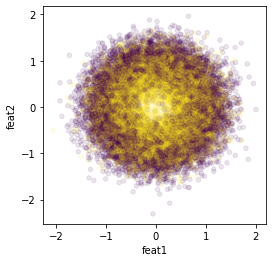

In [13]:
X = circles_df[["feat1", "feat2"]]
y = circles_df["label"]

# Visualizing the dataset
circles_df.plot.scatter(x="feat1",y="feat2",c="label",
                        cmap="viridis", colorbar=False, figsize=(4, 4), alpha=0.1);

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

8
[0.5296666666666666, 0.5619444444444445, 0.5942222222222222, 0.6140555555555555, 0.6140555555555556, 0.6133333333333334, 0.6150555555555555, 0.6161111111111112, 0.6141666666666666, 0.6102222222222222, 0.6061666666666665, 0.5992777777777778, 0.5956666666666666, 0.5936111111111111, 0.5877222222222223, 0.5858333333333332, 0.5848888888888888, 0.5792222222222222, 0.5779444444444444, 0.571388888888889]
0.6161111111111112


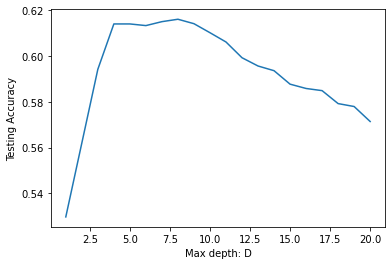

In [14]:
max_depth_range = range(1,21)
scoreMax = 0
scores_list = []

for m in max_depth_range:
    dT = DecisionTreeClassifier(max_depth = m, random_state = 42)
    scores = (cross_val_score(dT,X_train,y_train, cv = 10))
    scoreAvg = np.mean(scores)
    #print(scores)
    scores_list.append(scoreAvg)
    
    if(scoreAvg>= scoreMax):
        scoreMax = scoreAvg
        maxDepthVal = m
    
plt.plot(max_depth_range, scores_list) 
plt.xlabel('Max depth: D')
plt.ylabel('Testing Accuracy')
print(maxDepthVal)
print(scores_list)
print(scoreMax)    
#np.max(scores_list)

